In [1]:
!pwd

/home/rahuliyer/code/hramzan01/market/notebooks


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from energy_price_pred.energypricepred import *

/home/rahuliyer/.pyenv/versions/3.11.6/envs/market/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [12]:
download_file(file, save_path)
df_price, train, test = process_df(file)
model, forecast_y_df, df_cv, df_p = ml_model(df_price)

File downloaded successfully
2019-05-15 23:00:00+00:00
8640
df created including time history of electricity export prices between 2023-09-21 23:00:00 and 2024-03-19 22:30:00 i.e. for the last 179 days 23:30:00 days


07:55:32 - cmdstanpy - INFO - Chain [1] start processing
07:55:36 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|          | 0/8 [00:00<?, ?it/s]07:55:38 - cmdstanpy - INFO - Chain [1] start processing
07:55:39 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▎        | 1/8 [00:01<00:13,  1.86s/it]07:55:39 - cmdstanpy - INFO - Chain [1] start processing
07:55:40 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 2/8 [00:03<00:09,  1.51s/it]07:55:41 - cmdstanpy - INFO - Chain [1] start processing
07:55:42 - cmdstanpy - INFO - Chain [1] done processing
 38%|███▊      | 3/8 [00:04<00:08,  1.67s/it]07:55:43 - cmdstanpy - INFO - Chain [1] start processing
07:55:45 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 4/8 [00:07<00:08,  2.07s/it]07:55:45 - cmdstanpy - INFO - Chain [1] start processing
07:55:47 - cmdstanpy - INFO - Chain [1] done processing
 

In [13]:
df_price.tail()

,ds,y
84954,2024-03-19 20:30:00,8.04
84955,2024-03-19 21:00:00,9.66
84956,2024-03-19 21:30:00,8.09
84957,2024-03-19 22:00:00,8.62
84958,2024-03-19 22:30:00,7.64


In [14]:
pred_y_df,date1, date2, forecast_days = pred(df_price, model, forecast_start_date='2024-03-19', forceast_end_date='2024-03-25')

6


In [15]:
date1, date2, forecast_days

(datetime.date(2024, 3, 25), datetime.date(2024, 3, 19), 6)

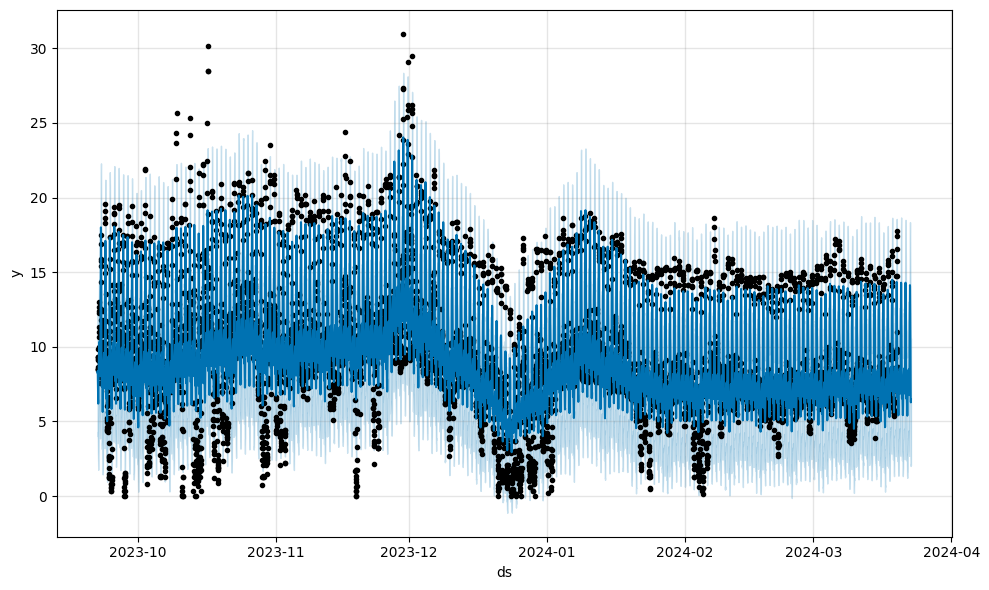

In [16]:
ax = model.plot(pred_y_df)

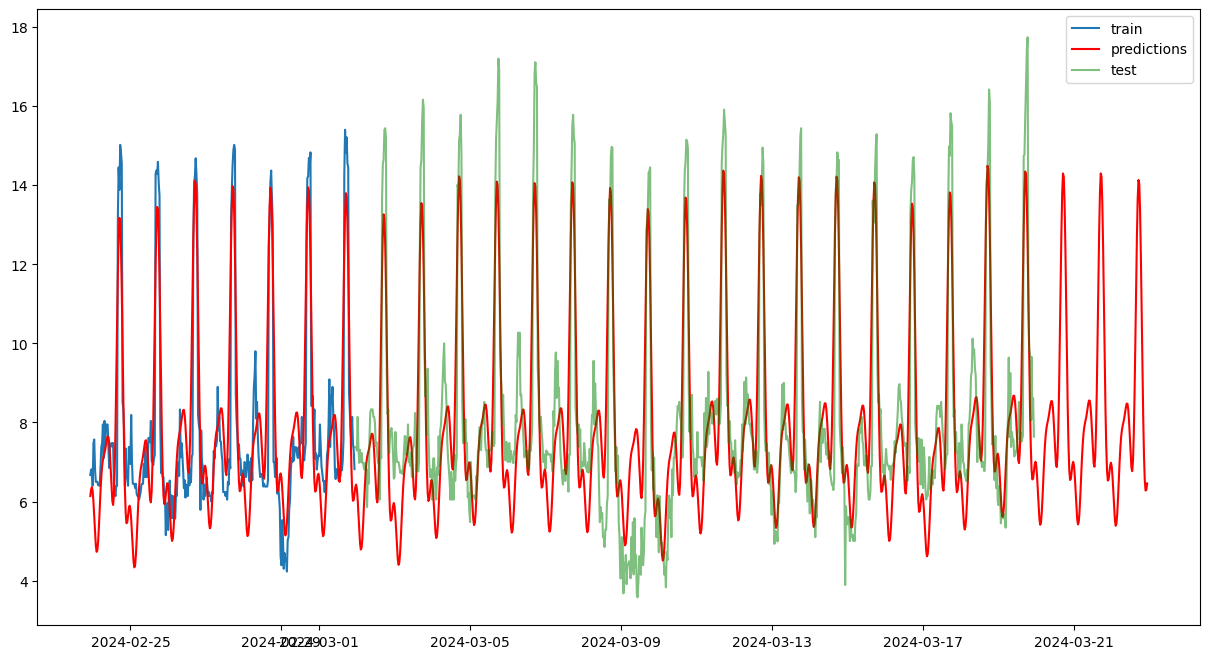

In [17]:
import matplotlib.pyplot as plt

days =7

date = train['ds'][train.index[-1]]- timedelta(days=days)
date_end = date + timedelta(days=days+90)
# date
train_date=train.loc[train['ds'] >= date ].copy()
forecast_date=pred_y_df.loc[(pred_y_df['ds'] >= date ) & (pred_y_df['ds'] <= date_end)].copy()
test_date=test.loc[test['ds'] <= date_end ].copy()

# train_date.head()
plt.figure(figsize=(15,8))
plt.plot(train_date['ds'], train_date['y'], label='train')
plt.plot(forecast_date['ds'], forecast_date['yhat'], label='predictions', color = 'red')
plt.plot(test_date['ds'], test_date['y'], label='test', color = 'green', alpha =0.5)
plt.legend(loc='best')